## Data Wrangling

In [1]:
## first the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
## let's load some random data
data = pd.read_csv('C://Users//12145//Documents//GitHub//Python//data//netflix_titles.csv', encoding_errors="ignore")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
## the first thing that jumps out is the un-named columns
print(data.columns)
# print(data.info())
## which we can simply drop, since they're empty
## and caused by the poor data quality
def data_cleaner(df):
    drop_list = []
    ## lowercasing the column names
    df.columns = [x.replace(r'\s+', '_').lower() for x in df.columns]
    # drop_list = [x for x in df.columns if x.lower().startswith('unnamed')]
    for col in df.columns:
        if col.lower().startswith('unnamed') and len(df[col].isna()) == df.shape[0]: 
            df.drop(col, axis=1, inplace = True)
        elif df[col].dtype == 'object' and df[col].nunique() < 5:
            df[col] = df[col].str.replace(r'\s+','_', regex=True).str.lower()
            df = pd.get_dummies(data = df, columns = [col])
    return df
cleaned_data = data_cleaner(data.copy())
cleaned_data.head()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_movie,type_tv_show
0,s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1,0
1,s2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,1
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,1
3,s4,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,1
4,s5,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,1


(array([1.000e+00, 8.000e+00, 9.000e+00, 2.100e+01, 4.200e+01, 1.050e+02,
        1.770e+02, 4.200e+02, 1.809e+03, 6.217e+03]),
 array([1925. , 1934.9, 1944.8, 1954.7, 1964.6, 1974.5, 1984.4, 1994.3,
        2004.2, 2014.1, 2024. ]),
 <BarContainer object of 10 artists>)

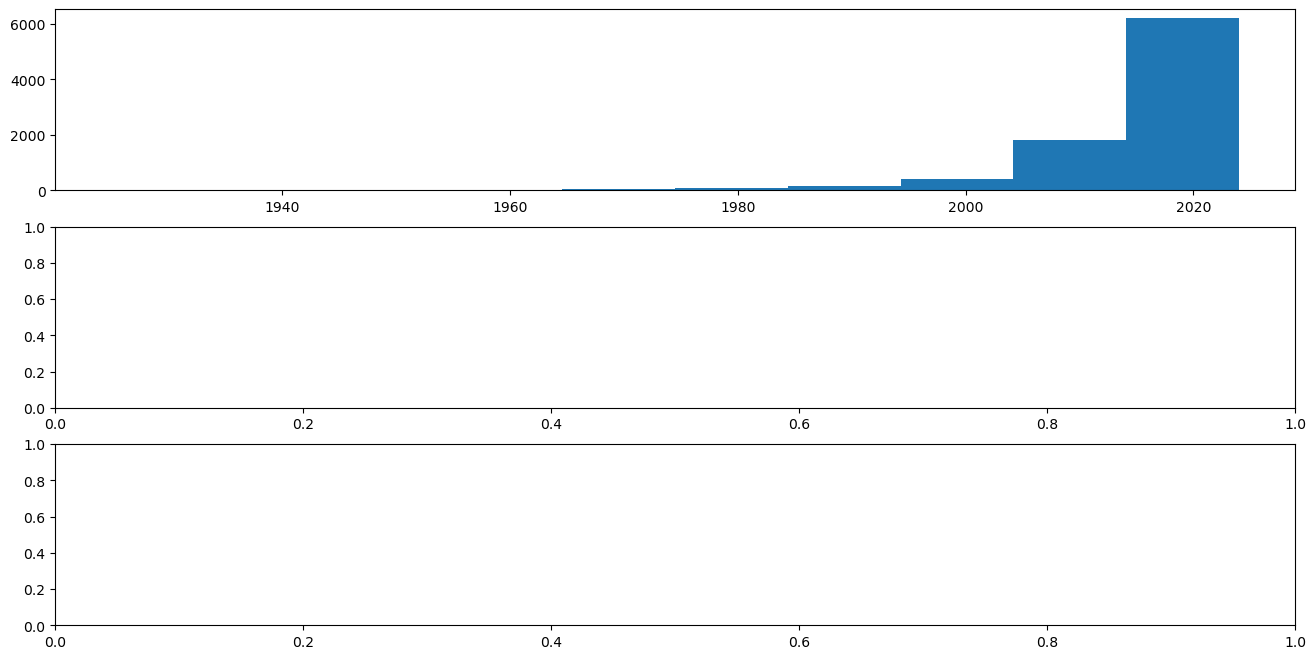

In [68]:
fig, ax = plt.subplots(nrows =3, ncols=1, figsize = (16, 8))
ax[0].hist(cleaned_data.release_year)